<a href="https://colab.research.google.com/github/jonnie763/DATA-602-Intro-to-Data-Analysis-and-Machine-Learning/blob/main/Machine_Learning_Portion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Read the AirPassengers dataset
airline = pd.read_csv('/content/UNRATE (1).csv')

airline

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
905,2023-06-01,3.6
906,2023-07-01,3.5
907,2023-08-01,3.8
908,2023-09-01,3.8


In [2]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.6 MB/s eta 0:00:00


In [3]:
# Import the library
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(airline['UNRATE'], start_p = 1, start_q = 1,
						max_p = 3, max_q = 3, m = 12,
						start_P = 0, seasonal = True,
						d = None, D = 1, trace = True,
						error_action ='ignore', # we don't want to know if an order does not work
						suppress_warnings = True, # we don't want convergence warnings
						stepwise = True)		 # set to stepwise

# To print the summary
stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=5.82 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=3207.715, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1363.675, Time=2.10 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=2313.099, Time=3.31 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=3205.716, Time=0.09 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1609.472, Time=0.33 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1266.786, Time=7.49 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=29.45 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=5.41 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=3169.319, Time=3.60 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=1263.576, Time=6.81 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1359.702, Time=3.02 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=20.90 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=14.82 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  910
Model:             SARIMAX(1, 0, 1)x(2, 1, [], 12)   Log Likelihood                -625.750
Date:                             Thu, 09 Nov 2023   AIC                           1261.500
Time:                                     07:51:20   BIC                           1285.501
Sample:                                          0   HQIC                          1270.670
                                             - 910                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9445      0.010     90.604      0.000       0.924       0.965
ma.L1          0.0815      0.015      5.277      0.000       0.051       0.112
ar.S.L12      -0.6618      0.006   -112.857      0.000      -0.673      -0.650
ar.S.L24      -0.3255      0.005    -59.464      0.000      -0.336      -0.315
sigma2         0.2339      0.001    201.437      0.000       0.232       0.236
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2097180.44
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               6.06   Skew:                             9.62
Prob(H) (two-sided):                  0.00   Kurtosis:                       238.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [4]:
# Split data into train / test sets
train = airline.iloc[:len(airline)-12]
test = airline.iloc[len(airline)-12:] # set one year(12 months) for testing

# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['UNRATE'],
				order = (0, 1, 1),
				seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             UNRATE   No. Observations:                  898
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -506.370
Date:                            Thu, 09 Nov 2023   AIC                           1022.741
Time:                                    07:51:31   BIC                           1046.669
Sample:                                         0   HQIC                          1031.889
                                            - 898                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0476      0.009      5.444      0.000       0.030       0.065
ar.S.L12      -0.1188      0.114     -1.042      0.297      -0.342       0.105
ar.S.L24      -0.1088      0.116     -0.939      0.348      -0.336       0.118
ma.S.L12      -0.8992      0.104     -8.673      0.000      -1.102      -0.696
sigma2         0.1788      0.001    199.398      0.000       0.177       0.181
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           5674213.75
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               6.41   Skew:                            15.85
Prob(H) (two-sided):                  0.00   Kurtosis:                       393.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

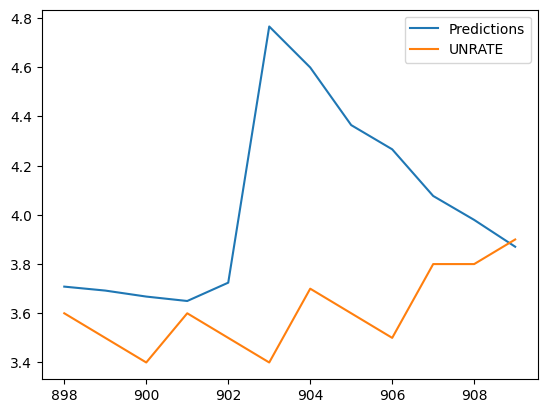

In [5]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
							typ = 'levels').rename("Predictions")

# plot predictions and actual values
predictions.plot(legend = True)
test['UNRATE'].plot(legend = True)

In [6]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test["UNRATE"], predictions)

# Calculate mean squared error
mean_squared_error(test["UNRATE"], predictions)

0.34416763820511215

<Axes: >

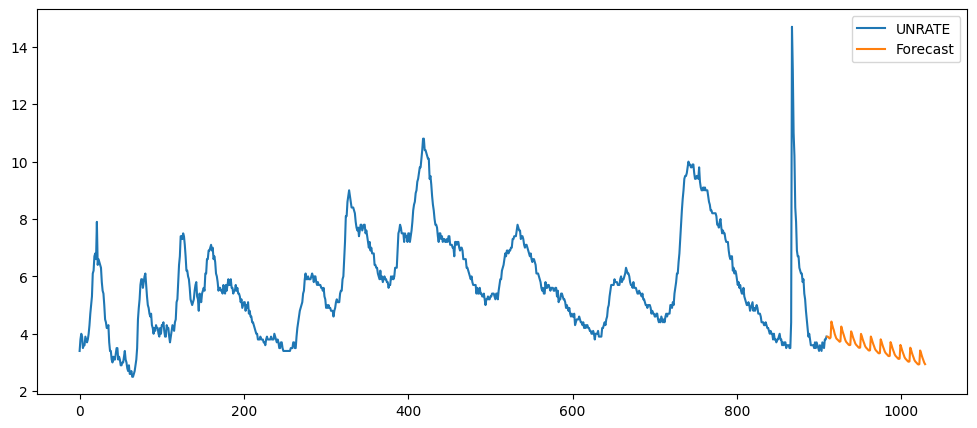

In [7]:
# Train the model on the full dataset
model = model = SARIMAX(airline['UNRATE'],
						order = (0, 1, 1),
						seasonal_order =(2, 1, 1, 12))
result = model.fit()

# Forecast for the next 3 years
forecast = result.predict(start = len(airline),
						end = (len(airline)-1) + 10 * 12,
						typ = 'levels').rename('Forecast')

# Plot the forecast values
airline['UNRATE'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)